# Import Statements

In [39]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# One Hot Encoding the Target Classes

In [40]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [41]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [42]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [43]:
data = np.array(data)
data.shape

(140, 128, 128, 3)

In [44]:
result = np.array(result)
result = result.reshape(140,2)

# Splitting the Data into Training & Testing

In [45]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [46]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics = ["accuracy"])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

In [47]:
y_train.shape

(112, 2)

In [48]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 4s 1s/step - loss: 36.3713 - accuracy: 0.4196 - val_loss: 154.8359 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 25.0261 - accuracy: 0.5357 - val_loss: 57.3907 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 18.4170 - accuracy: 0.5179 - val_loss: 31.2608 - val_accuracy: 0.3929
Epoch 4/30
3/3 [==============================] - 3s 915ms/step - loss: 10.6598 - accuracy: 0.6071 - val_loss: 25.7817 - val_accuracy: 0.4286
Epoch 5/30
3/3 [==============================] - 3s 925ms/step - loss: 11.8745 - accuracy: 0.6250 - val_loss: 28.8646 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 3s 891ms/step - loss: 8.4851 - accuracy: 0.5536 - val_loss: 20.8549 - val_accuracy: 0.4643
Epoch 7/30
3/3 [==============================] - 3s 979ms/step - loss: 7.6294 - accuracy: 0.5000 - val_loss: 16.8219 - val_accuracy: 0.3929
Epoch 8/30
3/3 [

In [49]:
model.save("brain_tumor.model", save_format="h5")

In [50]:
history = model.history.history

In [51]:
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


# Plotting Losses

In [52]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    plt.figure(figsize=(15,5))
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

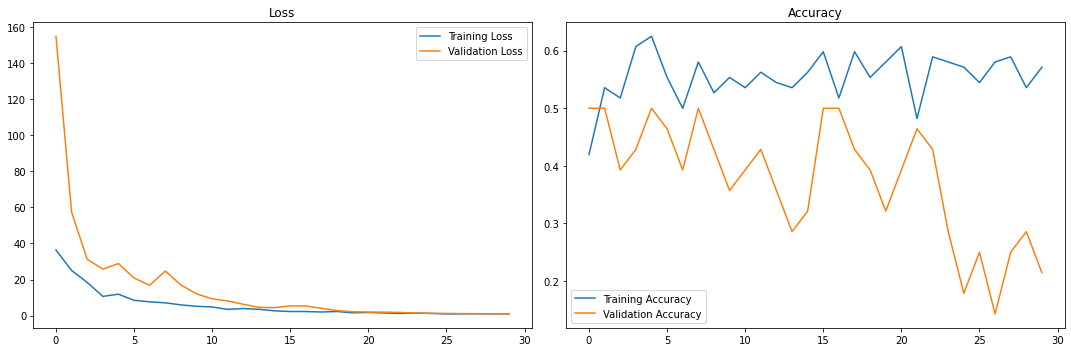

In [53]:
plot_metrics(history)

# Just Checking the Model

In [54]:
from tensorflow.keras.models import Model, load_model
loadmodel = load_model(filepath='./brain_tumor.model')

In [55]:
loadmodel.metrics_names

['loss', 'accuracy']

In [56]:
loss, acc = loadmodel.evaluate(x=x_test, y=y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.9901 - accuracy: 0.2143


In [57]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.9901377558708191
Test Accuracy = 0.2142857164144516


In [58]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

50.9552001953125% Confidence This Is Its a Tumor


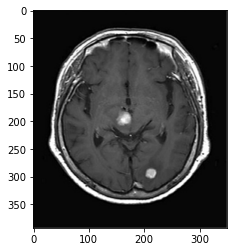

In [59]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

53.708863258361816% Confidence This Is A No, Its not a tumor


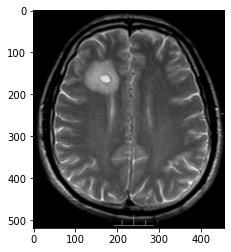

In [60]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

# Thats It !!